In [6]:
#import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
path = r'/Users/carolinazea/OneDrive/CareerFoundry/Achievement 4- Python/Instacart Basket Analysis'

In [8]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_groupingdata.pkl'))

In [4]:
ords_prods_merge.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,Busiest_slowest_days,busiest_period_of_day,median_order,order_frequency_flag,avg_price,spending_flag,max_order,loyalty_flag
0,2539329,1,1,2,8,11.114836,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,20.0,Regular customer,6.367797,Low spender,10,New customer
1,2398795,1,2,3,7,15.000000,196,1,1,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,20.0,Regular customer,6.367797,Low spender,10,New customer
2,473747,1,3,3,12,21.000000,196,1,1,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,20.0,Regular customer,6.367797,Low spender,10,New customer
3,2254736,1,4,4,7,29.000000,196,1,1,Soda,...,Mid-range product,Least busy,Slowest Days,Average orders,20.0,Regular customer,6.367797,Low spender,10,New customer
4,431534,1,5,4,15,28.000000,196,1,1,Soda,...,Mid-range product,Least busy,Slowest Days,Average orders,20.0,Regular customer,6.367797,Low spender,10,New customer


# Bar charts 
#### Using 'orders_day_of_week' aka categorical 

### .plot.bar() : tells Python to find the bar() function within the plot module

<AxesSubplot:>

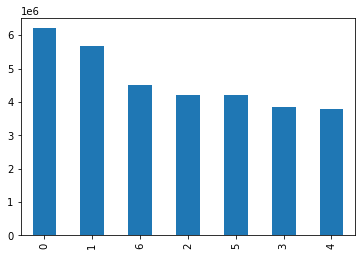

In [16]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

### .sort_index() : function will sort the bars in your chart according to their index order

<AxesSubplot:>

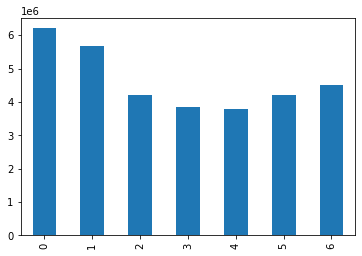

In [17]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

### (color=['purple', 'red', 'pink']) 

<AxesSubplot:>

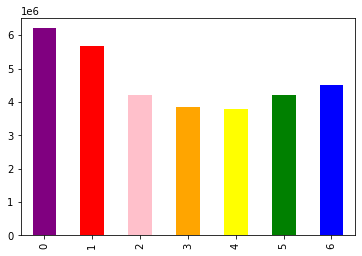

In [19]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

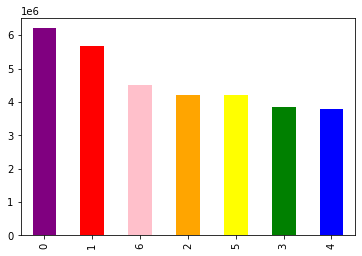

In [21]:
#  The code you used above generated a preview for your visualization but didn’t actually save it in Jupyter’s memory. 
#  Set the bar chart to df 'bar' . You’ll need to update your command to change this:

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### bar.figure() ---> export it outside of Jupyter in the form of an image file using figure.savefig()

In [22]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Histograms 
#### Using 'prices' aka continous 

In [ ]:
## conduct data checks to find mean, median, and max values using describe() or df['columns'].mean()

### .plot.hist()

<AxesSubplot:ylabel='Frequency'>

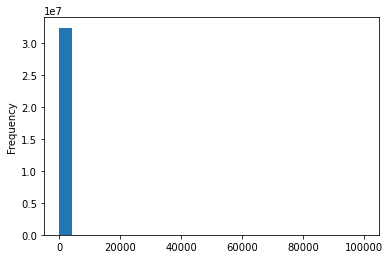

In [23]:
ords_prods_merge['prices'].plot.hist(bins = 25)

# Since there is only one column in histogram for the 25 bins, you know this is incorrect so next step, scatterplot

## Histograms/Scatterplots: to view outliers 

### sns.scatterplot()

<AxesSubplot:xlabel='prices', ylabel='prices'>

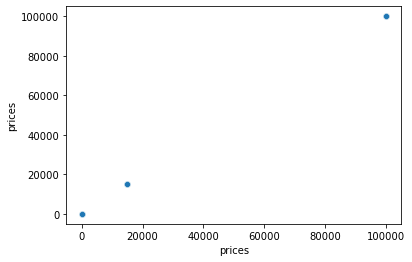

In [24]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [ ]:
Let’s first determine whether there are any values above a certain threshold in your data, 
    for instance, anything above the “normal” price of a supermarket item. 
    If you imagined the maximum price anyone would pay in a supermarket were around $100, 
    then anything above that amount could be considered an outlier.

In [26]:
pd.options.display.max_columns = None

In [27]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_slowest_days,busiest_period_of_day,median_order,order_frequency_flag,avg_price,spending_flag,max_order,loyalty_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,5.000000,Frequent customer,108.648299,High spender,40,Regular customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,5.000000,Frequent customer,108.648299,High spender,40,Regular customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,11.557418,Regular customer,1154.792308,High spender,4,New customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Busiest days,Average orders,11.557418,Regular customer,1154.792308,High spender,4,New customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,20.000000,Regular customer,114.426619,High spender,16,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Average orders,4.000000,Frequent customer,1106.743956,High spender,39,Regular customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Average orders,4.000000,Frequent customer,1106.743956,High spender,39,Regular customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Regularly busy,Average orders,5.000000,Frequent customer,451.153540,High spender,15,Regular customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Regularly busy,Average orders,11.114836,Regular customer,1178.381871,High spender,12,Regular customer


In [ ]:
At the top of the “prices” column, you can see that there’s another odd value, $14,900.00, which 
corresponds to the second unexplainable point in the scatterplot. 
Following this is the $99,999.00 you identified previously. 
As such, you can assume that it’s the $14,900.00 and $99,999.00 values that are skewing your charts.

In [ ]:
## Mark values ($14,900.00) as missing since they don’t make sense in terms of the other values in the column.

### = np.nan: From the NumPy library; it’s used to assign missing values

In [28]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [ ]:
## Check whether the replacement was successful by running a max-value check on your “prices” column

In [30]:
# Bin should = 25 as that was set as the max value

ords_prods_merge['prices'].max()

25.0

In [ ]:
# Define the histogram df to 'hist = ''

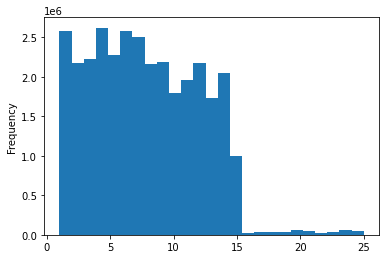

In [31]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

# Most prices are within 0 to $15 

In [ ]:
To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70
define df to 'hist_2 ='

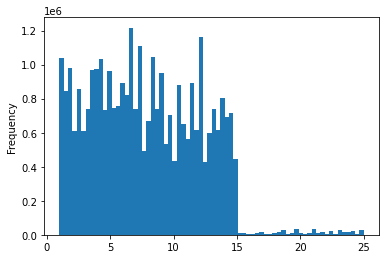

In [32]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

# Will create thinner lines 

### hist.figure() ---> export it outside of Jupyter in the form of an image file using figure.savefig()

In [33]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_dow.png'))

## Sampling Data for Line Charts

In [35]:
np.random.rand(10)

array([0.79061965, 0.58165743, 0.84889336, 0.32715144, 0.44901392,
       0.46054579, 0.46178626, 0.71672447, 0.63408497, 0.51795322])

In [ ]:
# 1.  Set the seed for the random number generator

In [ ]:
#The value you put inside the seed doesn’t actually matter in the grand scheme of things

np.random.seed(4)

In [ ]:
# 2. Creating these samples requires a list of random floating numbers between 0 and 1 
 #     (with 1 representing 100 percent of the dataframe) that’s as long as the length of the dataframe.

          70/30 split, for example, the 30 percent 
          sample would statistically resemble the 70 percent sample but contain less rows.

         You’d normally use 80 percent of a data set to train the algorithm and the 
        remaining 20 percent to check the accuracy of the model.

In [ ]:
# 3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).

np.random.rand(len(ords_prods_merge)) <= 0.7

In [ ]:
# 4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [36]:
##

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [37]:
# Stores 70 % of the sample 
# For every value in the list that’s True

big = ords_prods_merge[dev]

In [38]:
# Stores 30 % of the sample 
# For every value in the list that’s False

small = ords_prods_merge[~dev]

In [39]:
# if you added the rows of both samples together, you’d get 
# the same numbers of rows as your original ords_prods_merge dataframe.

len(ords_prods_merge)

32404859

In [40]:
# confirm total number of rows of big and small, does it equal to the original df?

len(big) + len(small)

32404859

## Line Charts
### sns.lineplot

In [42]:
# Include columns necessary for the chart 
# Set it to df_2 

df_2 = small[['orders_day_of_week','prices']]

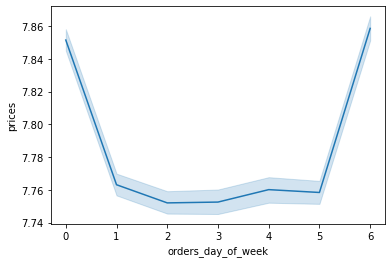

In [44]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Blue Error bands represent the chart’s confidence intervals. In other words, if this line were a prediction, 
# there would be a 95 percent probability that the predicted value would fall within the area of the error bands.

In [45]:
#  The best way to check is to compare the line chart of your subset 
#  with the line chart of the entire dataframe (or even the big sample)

df_4 = ords_prods_merge[['orders_day_of_week','prices']]

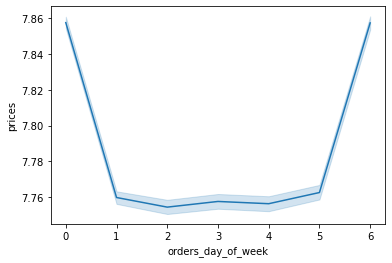

In [46]:
# Use df_4 in line_2

line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')